***PHY204 Project -- Mohamed Atouife & Haoxuan Zhang*** 

In [7]:
from mpl_toolkits import mplot3d 
from mpl_toolkits.mplot3d import Axes3D 
from datetime import datetime 
import numpy as np 
import matplotlib.pyplot as plt 
import copy 

%matplotlib notebook 

**Exercise 1 : Mean-Value Theorem for The Electric Potential** 

a) We consider a point charge $q$ at position $\vec{r}' = z \vec{e}_z$ outside of a sphere of radius $R$. Its potential is that 

$$ 
V \left( \vec{r} \right) = \frac{q}{4 \pi \epsilon_0} \frac{1}{\| \vec{r} - \vec{r}' \|} 
$$ 

Moreover, since $\vec{r} = R \vec{e}_r$ and $\vec{r}' = z \vec{e}_z$, we have that 

$$ 
\| \vec{r} - \vec{r}' \| = \sqrt{R^2 + z^2 - 2Rz \cos{\theta}} 
$$ 

Hence, by averaging its potential over the sphere's surface, we obtain that 

\begin{align}
\frac{1}{4 \pi R^2} \int_{\partial S} V \left( \vec{r} \right) \, \text{d}a 
&= \frac{1}{4 \pi R^2} \iint V \left( \vec{r} \right) \, \text{d}S 
\\ 
&= \frac{1}{4 \pi R^2} \frac{q}{4 \pi \epsilon_0} \int_{0}^{\pi} \int_{0}^{2 \pi} \frac{1}{\sqrt{R^2 + z^2 - 2Rz \cos{\theta}}} R^2 \sin{\theta} \, \text{d}\theta \, \text{d}\varphi 
\\ 
&= \frac{1}{4 \pi R^2} \frac{q}{4 \pi \epsilon_0} 2 \pi R^2 \int_{0}^{\pi} \frac{\sin{\theta}}{\sqrt{R^2 + z^2 - 2Rz \cos{\theta}}} \, \text{d}\theta 
\\ 
&= \frac{1}{2} \frac{q}{4 \pi \epsilon_0} \int_{0}^{\pi} \frac{\sin{\theta}}{\sqrt{R^2 + z^2 - 2Rz \cos{\theta}}} \, \text{d}\theta 
\end{align} 

Let $u = \cos{\theta}$, we obtain that 
\begin{align} 
\frac{1}{4 \pi R^2} \int_{\partial S} V \left( \vec{r} \right) \, \text{d}a 
&= \frac{1}{2} \frac{q}{4 \pi \epsilon_0} \int_{1}^{-1} \frac{-1}{\sqrt{R^2 + z^2 - 2Rz u}} \, \text{d}u 
\\ 
&= - \frac{1}{2} \frac{q}{4 \pi \epsilon_0} \frac{1}{-2Rz} \left[ 2 \left( R^2 + z^2 - 2Rzu \right)^{1/2} \right]_{1}^{-1} 
\\ 
&= \frac{q}{4 \pi \epsilon_0} \frac{1}{2Rz} \left[ \left( R^2 + z^2 + 2Rz \right)^{1/2} - \left( R^2 + z^2 - 2Rz \right)^{1/2} \right] 
\\ 
&= \frac{q}{4 \pi \epsilon_0} \frac{1}{2Rz} \left[ (z + R) - (z - R) \right] 
\\ 
&= \frac{q}{4 \pi \epsilon_0} \frac{1}{z} 
\end{align} 

Therefore, we recover the same expression for the center of the sphere. 

$$ 
\frac{q}{4 \pi \epsilon_0} \frac{1}{z} = \frac{q}{4 \pi \epsilon_0} \frac{1}{\| \vec{r}_0 - \vec{r}' \|} 
\qquad \text{with} \quad \vec{r}_0 = \vec{0} 
$$ 

It means that for a point charge outside a sphere, its potential averaged over the surface of the sphere is equal to the potential produced at the center of the sphere. 

b) If consider a charge discrete charge distribution made of an ensemble of charges $q_i$ outside the sphere, then by the superposition principle, the resulting potential of such a charge distribution at a point M in the surface of the sphere is given by:

$$ 
V(M) = \sum_{i} V_{i}(M) \qquad \text{where $V_{i}$ is the potential generated by a charge $q_i$} 
$$ 

Now, performing an average over the surface of the sphere:

\begin{align}
    \frac{1}{4 \pi R^2} \int_{\delta(S)} V \, \text{d}a 
    &= \frac{1}{4 \pi R^2} \int_{\delta(S)} \sum_{i} V_{i}(M) \, \text{d}a 
    \\ 
    &= \sum_{i} \frac{1}{4 \pi R^2} \int_{\delta(S)} V_{i}(M) \, \text{d}a 
    \\ 
    &= \sum_{i} \frac{1}{4 \pi \epsilon_0} \frac{q_i}{| \vec{r}_0 - \vec{r} |} 
    \\ 
    &= V \left( \vec{r_0} \right) 
\end{align} 

Moreover, in the case of continuous charge distribution, the discrete sum becomes a continuous sum, and we would obtain the same result. 

Therefore, by the superposition principle, we know that for any charge distribution outside a sphere, its potential averaged over the surface of the sphere is equal to the total potential produced at the center of the sphere. 

**Exercise 2 : Relaxation Method** 

We consider an L-shaped volume and we aim to compute the potential over it. To do so, we can reduce this three dimensional problem to a two dimensional problem in the following way. We cut the L-shaped volume and consider the cross section. This cross section is L-shaped as well and  we then perferom an averaging procedure of the potential over this surface. If one repeats this procedure for all cross sections (perhaps infinitely many), we then obtain the potential over the entire volume.

First, we initialize all points with their initial values, according to the boundary conditions. 

In [2]:
"""
We construct the 2D surface. 
Input  : L, the shorter length of the L-shape. 
Output : V, a 2D surface with initial potential values. 
"""
def construct_surface(L): 
    V = [] 
    ### We construct the top part of the surface, which is a square of lenth L. 
    for i in range(L): 
        V.append([0]*(L)) 
        
    ### We construct the bottom part of the surface, which is a rectangle with length 2L * L. 
    for i in range(L): 
        V.append([0]*(2*L)) 
    
    ### We modify the value of side B. 
    for j in range(1,L+1): 
        V[j][-1] = 1/L * (j) 
    
    ### We modify the value of side C. 
    for j in range(L+1): 
        V[L][-j-1] = 1/L * (j) 
    
    return V 

We can use the following code to print the 2D surface in a more systematic way. 

In [13]:
L = 10 
V = construct_surface(L) 

for line in V: 
    print(line) 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.30000000000000004]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6000000000000001]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.7000000000000001]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5, 0.4, 0.30000000000000004, 0.2, 0.1, 0.0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0,

Then, we apply the relaxation method. 

In [8]:
"""
We execute the relaxation method to compute the potential. 
Input  : L, the shorter length of the L-shape. 
Output : V, a 2D surface with potential values obtained via the relaxation method. 
"""
def relaxation(L): 
    ### Initializations. 
    V       = construct_surface(L) 
    V_new   = construct_surface(L) 
    epsilon = np.zeros((2*L, 2*L)) 
    err     = 1 
    
    ### Computing the new potential values while the error is bigger than 10^(-5). 
    while (err > 10**(-5)): 
        for y in range(1, 2*L-1): 
            ### Considering the top part of the surface. 
            if (y <= L): 
                for x in range(1, L-1): 
                    V_new[y][x] = (1/4) * (V[y+1][x] + V[y-1][x] + V[y][x+1] + V[y][x-1]) 
                    epsilon[y][x] = V_new[y][x] - V[y][x] 
            ### Considering the bottom part of the surface. 
            else: 
                for x in range(1, 2*L-1): 
                    V_new[y][x] = (1/4) * (V[y+1][x] + V[y-1][x] + V[y][x+1] + V[y][x-1]) 
                    epsilon[y][x] = V_new[y][x] - V[y][x] 
                    
        err = max([np.max(eps) for eps in epsilon]) 
        V   = copy.deepcopy(V_new) 
            
    return V

Next, we plot the 3D graph with XY plane for the 2D space and Z-axis for the potential. 

<IPython.core.display.Javascript object>


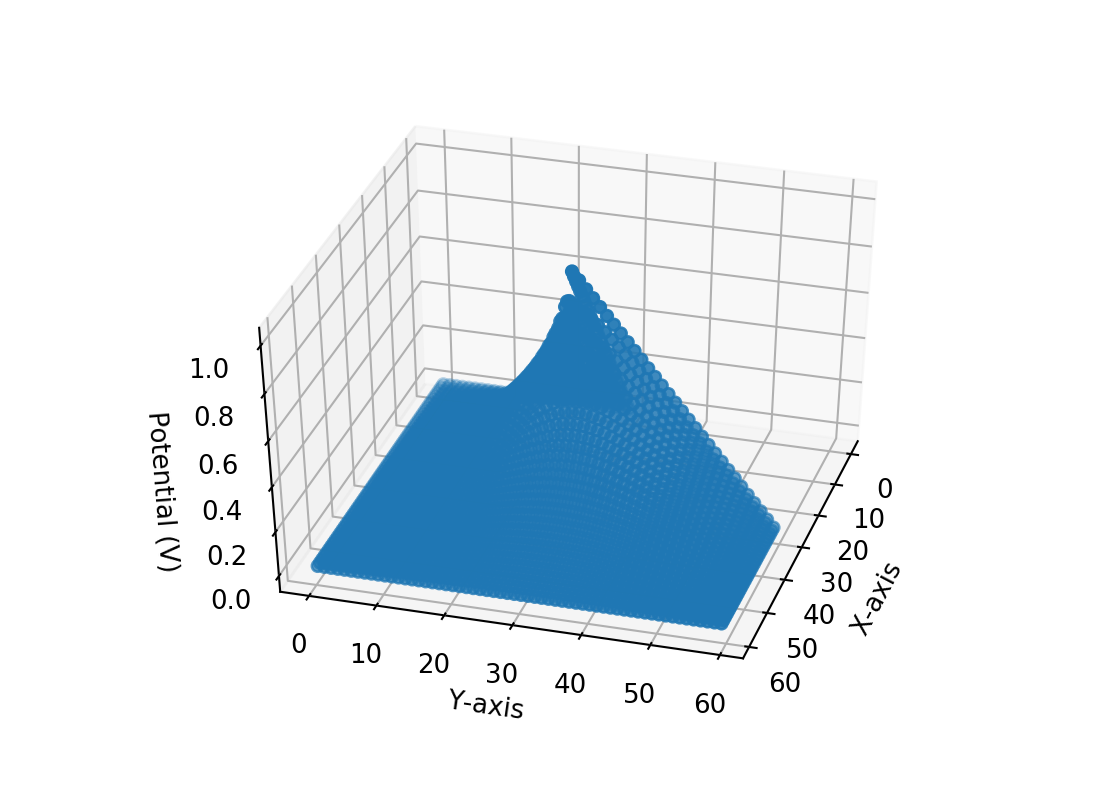

In [11]:
L = 30 
V = relaxation(L) 
X = [] 
Y = [] 
Z = [] 

for x in range(len(V)): 
    for y in range(len(V[x])): 
        X.append(x) 
        Y.append(y) 
        Z.append(V[x][y]) 

fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(X,Y,Z) 
ax.set_xlabel("X-axis") 
ax.set_ylabel("Y-axis") 
ax.set_zlabel("Potential (V)") 

for i in range(0, 360, 45):
    ax.view_init(None, i)
    plt.show() 

Finally, we compute the speed of our algorithm by using the following code. 

In [12]:
for L in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]: 
    start_time = datetime.now() 
    relaxation(L)
    time_elapsed = datetime.now() - start_time 
    print('Time elapsed (hh:mm:ss.ms) for {} is {}'.format(L, time_elapsed)) 

Time elapsed (hh:mm:ss.ms) for 10 is 0:00:00.119783
Time elapsed (hh:mm:ss.ms) for 20 is 0:00:01.226658
Time elapsed (hh:mm:ss.ms) for 30 is 0:00:04.760384
Time elapsed (hh:mm:ss.ms) for 40 is 0:00:13.376332
Time elapsed (hh:mm:ss.ms) for 50 is 0:00:28.534050
Time elapsed (hh:mm:ss.ms) for 60 is 0:00:53.464222
Time elapsed (hh:mm:ss.ms) for 70 is 0:01:33.840978
Time elapsed (hh:mm:ss.ms) for 80 is 0:02:23.271799
Time elapsed (hh:mm:ss.ms) for 90 is 0:03:25.469958
Time elapsed (hh:mm:ss.ms) for 100 is 0:05:04.868061


By running the code above, we obtain the following result. 

- Time elapsed (hh:mm:ss.ms) for 10 is 0:00:00.119783
- Time elapsed (hh:mm:ss.ms) for 20 is 0:00:01.226658
- Time elapsed (hh:mm:ss.ms) for 30 is 0:00:04.760384
- Time elapsed (hh:mm:ss.ms) for 40 is 0:00:13.376332
- Time elapsed (hh:mm:ss.ms) for 50 is 0:00:28.534050
- Time elapsed (hh:mm:ss.ms) for 60 is 0:00:53.464222
- Time elapsed (hh:mm:ss.ms) for 70 is 0:01:33.840978
- Time elapsed (hh:mm:ss.ms) for 80 is 0:02:23.271799
- Time elapsed (hh:mm:ss.ms) for 90 is 0:03:25.469958
- Time elapsed (hh:mm:ss.ms) for 100 is 0:05:04.868061
